## 生成された2D画像を目視で確認するためのdemo

In [36]:
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path

In [37]:
EXP_NAME = "exp029"
FOLD = 0
SEED = 42
exp_path = Path(f"../data/train/{EXP_NAME}/fold_{FOLD}/seed_{SEED}")


In [38]:
specs = dict()
for path in exp_path.rglob("*.npy"):
    file_name = path.name
    spec_mask = np.load(path)
    spec_mask = spec_mask.astype(np.float32)

    spec, mask = spec_mask[..., :3], spec_mask[..., 3:]
    spec_min = spec.min(axis=(0, 1), keepdims=True)
    spec_max = spec.max(axis=(0, 1), keepdims=True)
    spec = (spec - spec_min) / (spec_max - spec_min)
    eeg_id = int(file_name.split("_")[1].split(".")[0])

    spec = np.concatenate([spec, mask], axis=-1)
    specs[eeg_id] = spec

    print(file_name, spec.shape)

spec_4171147147.npy (128, 256, 12)
spec_512230501.npy (128, 256, 12)
spec_2298428308.npy (128, 256, 12)
spec_1710713704.npy (128, 256, 12)
spec_3732288519.npy (128, 256, 12)


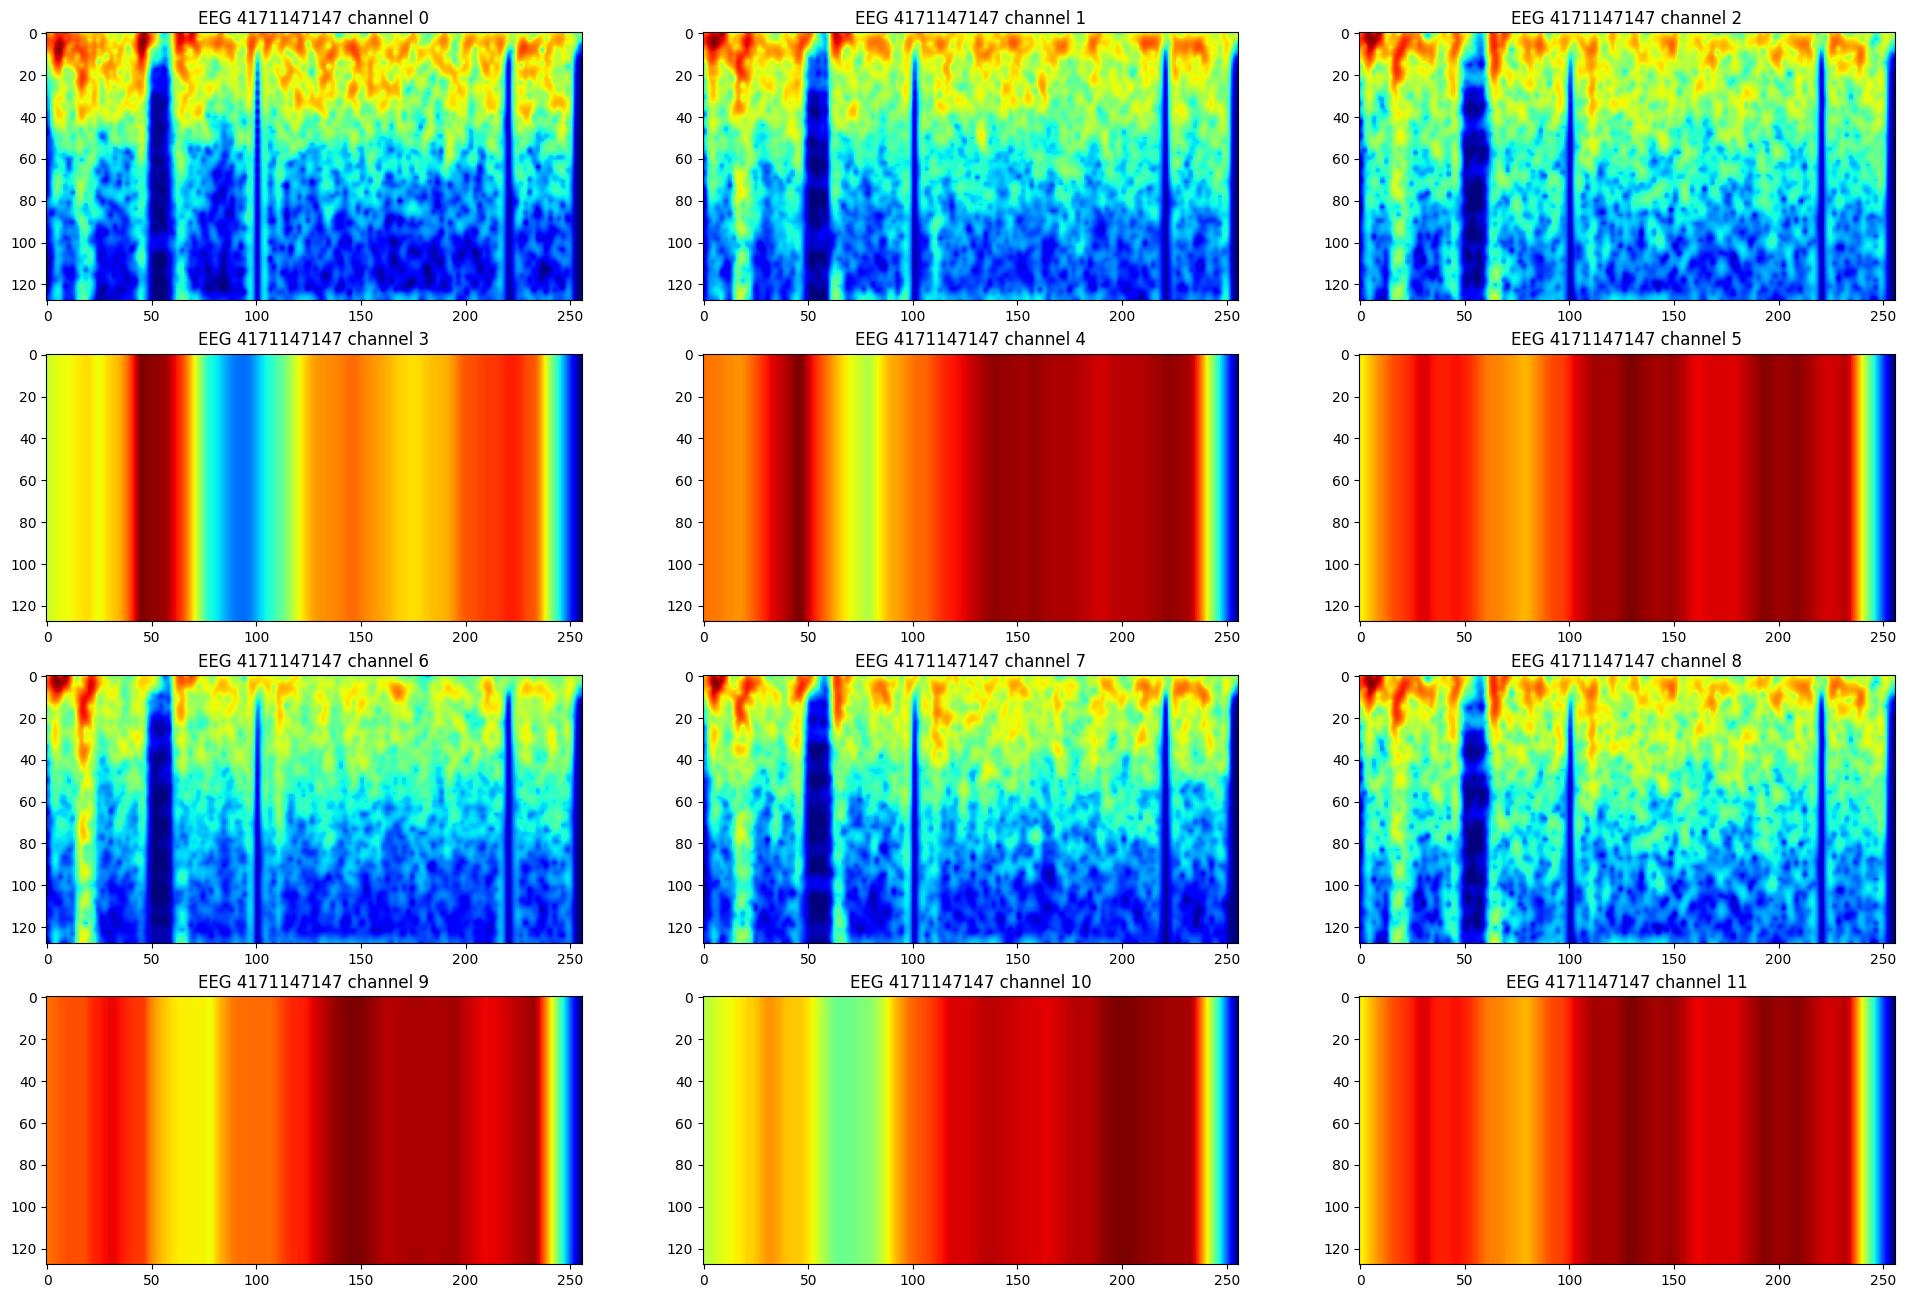

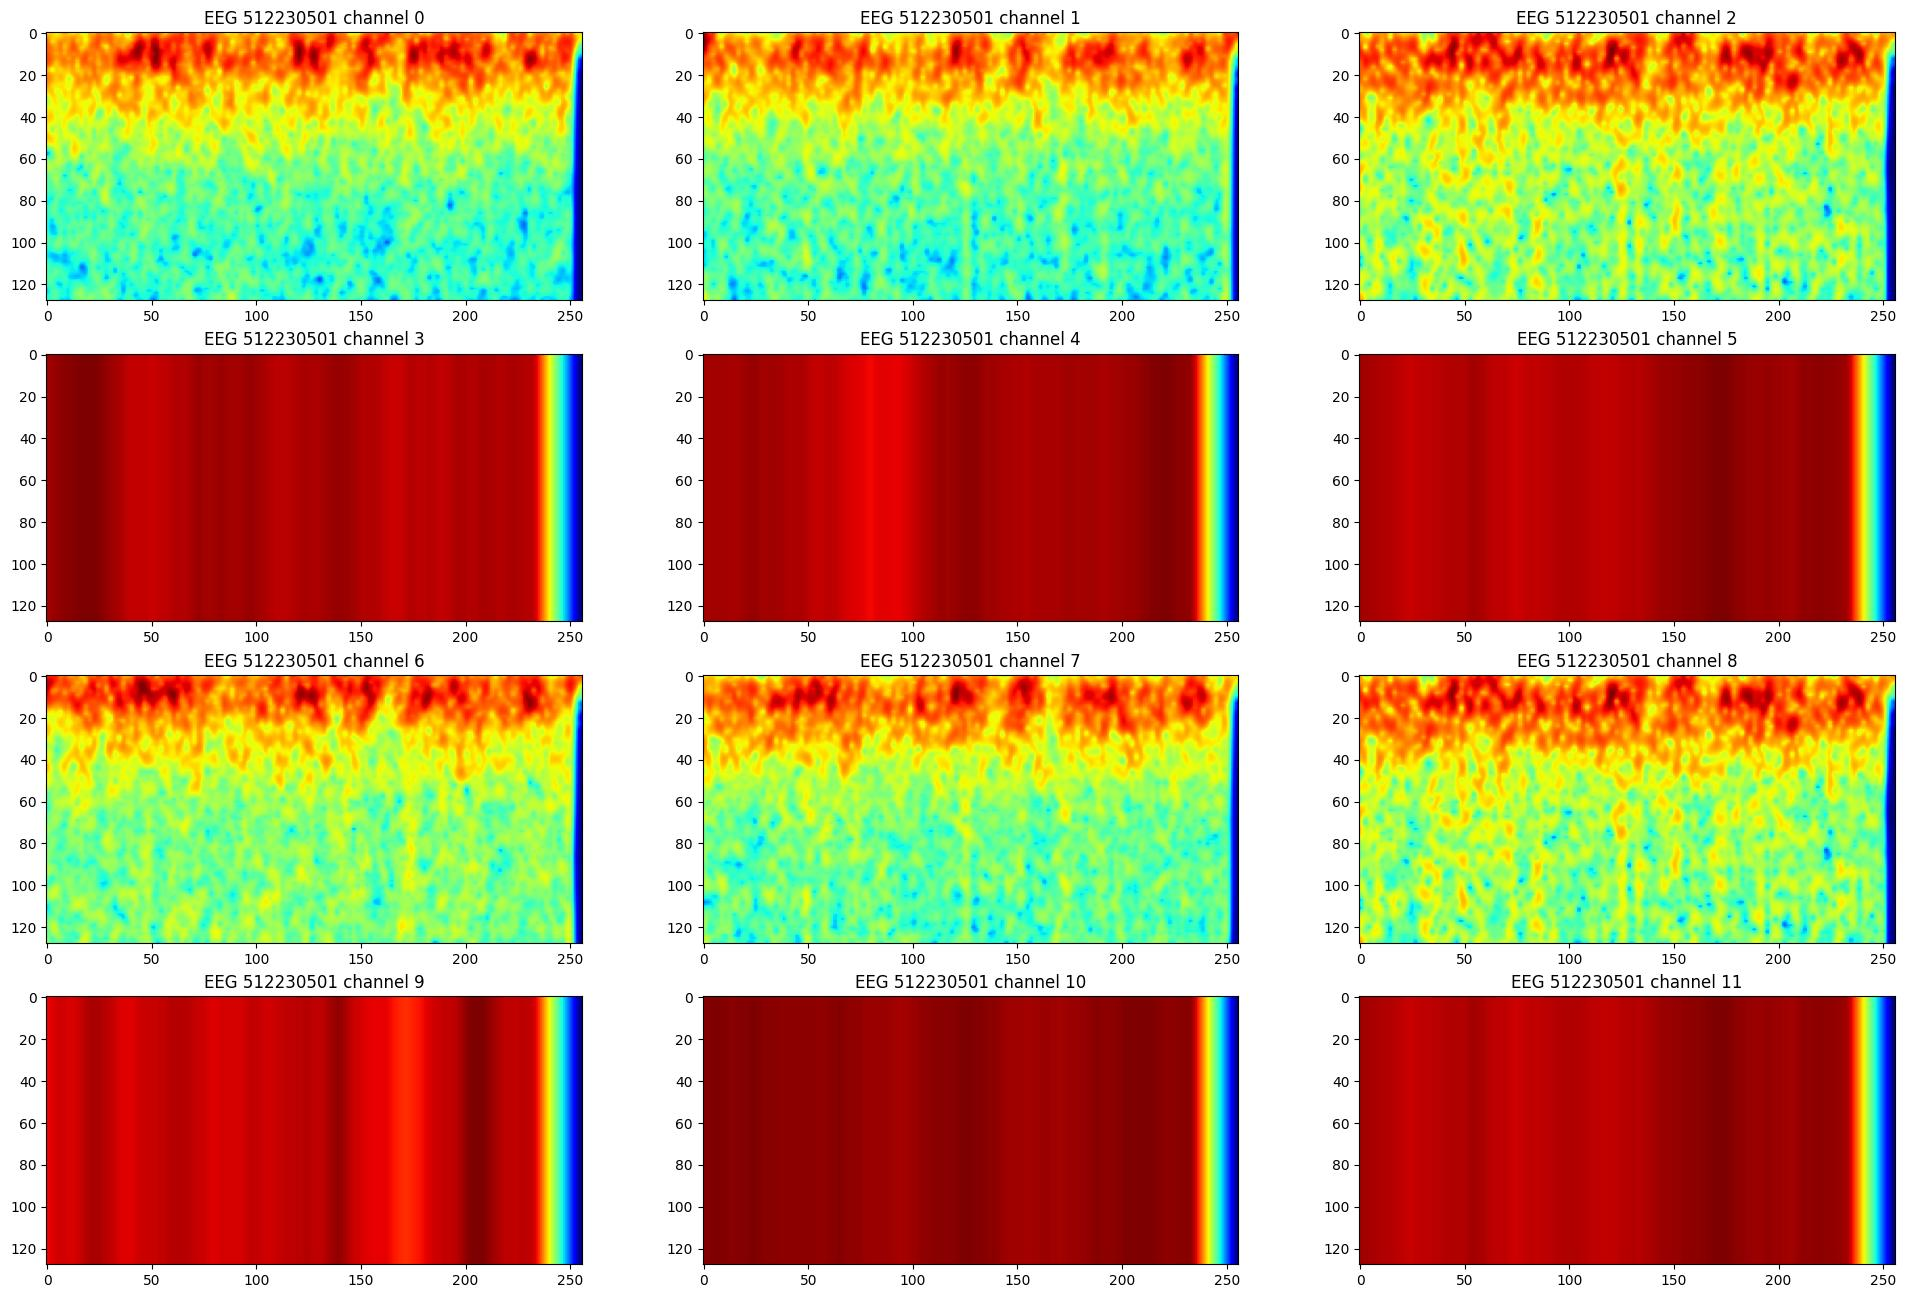

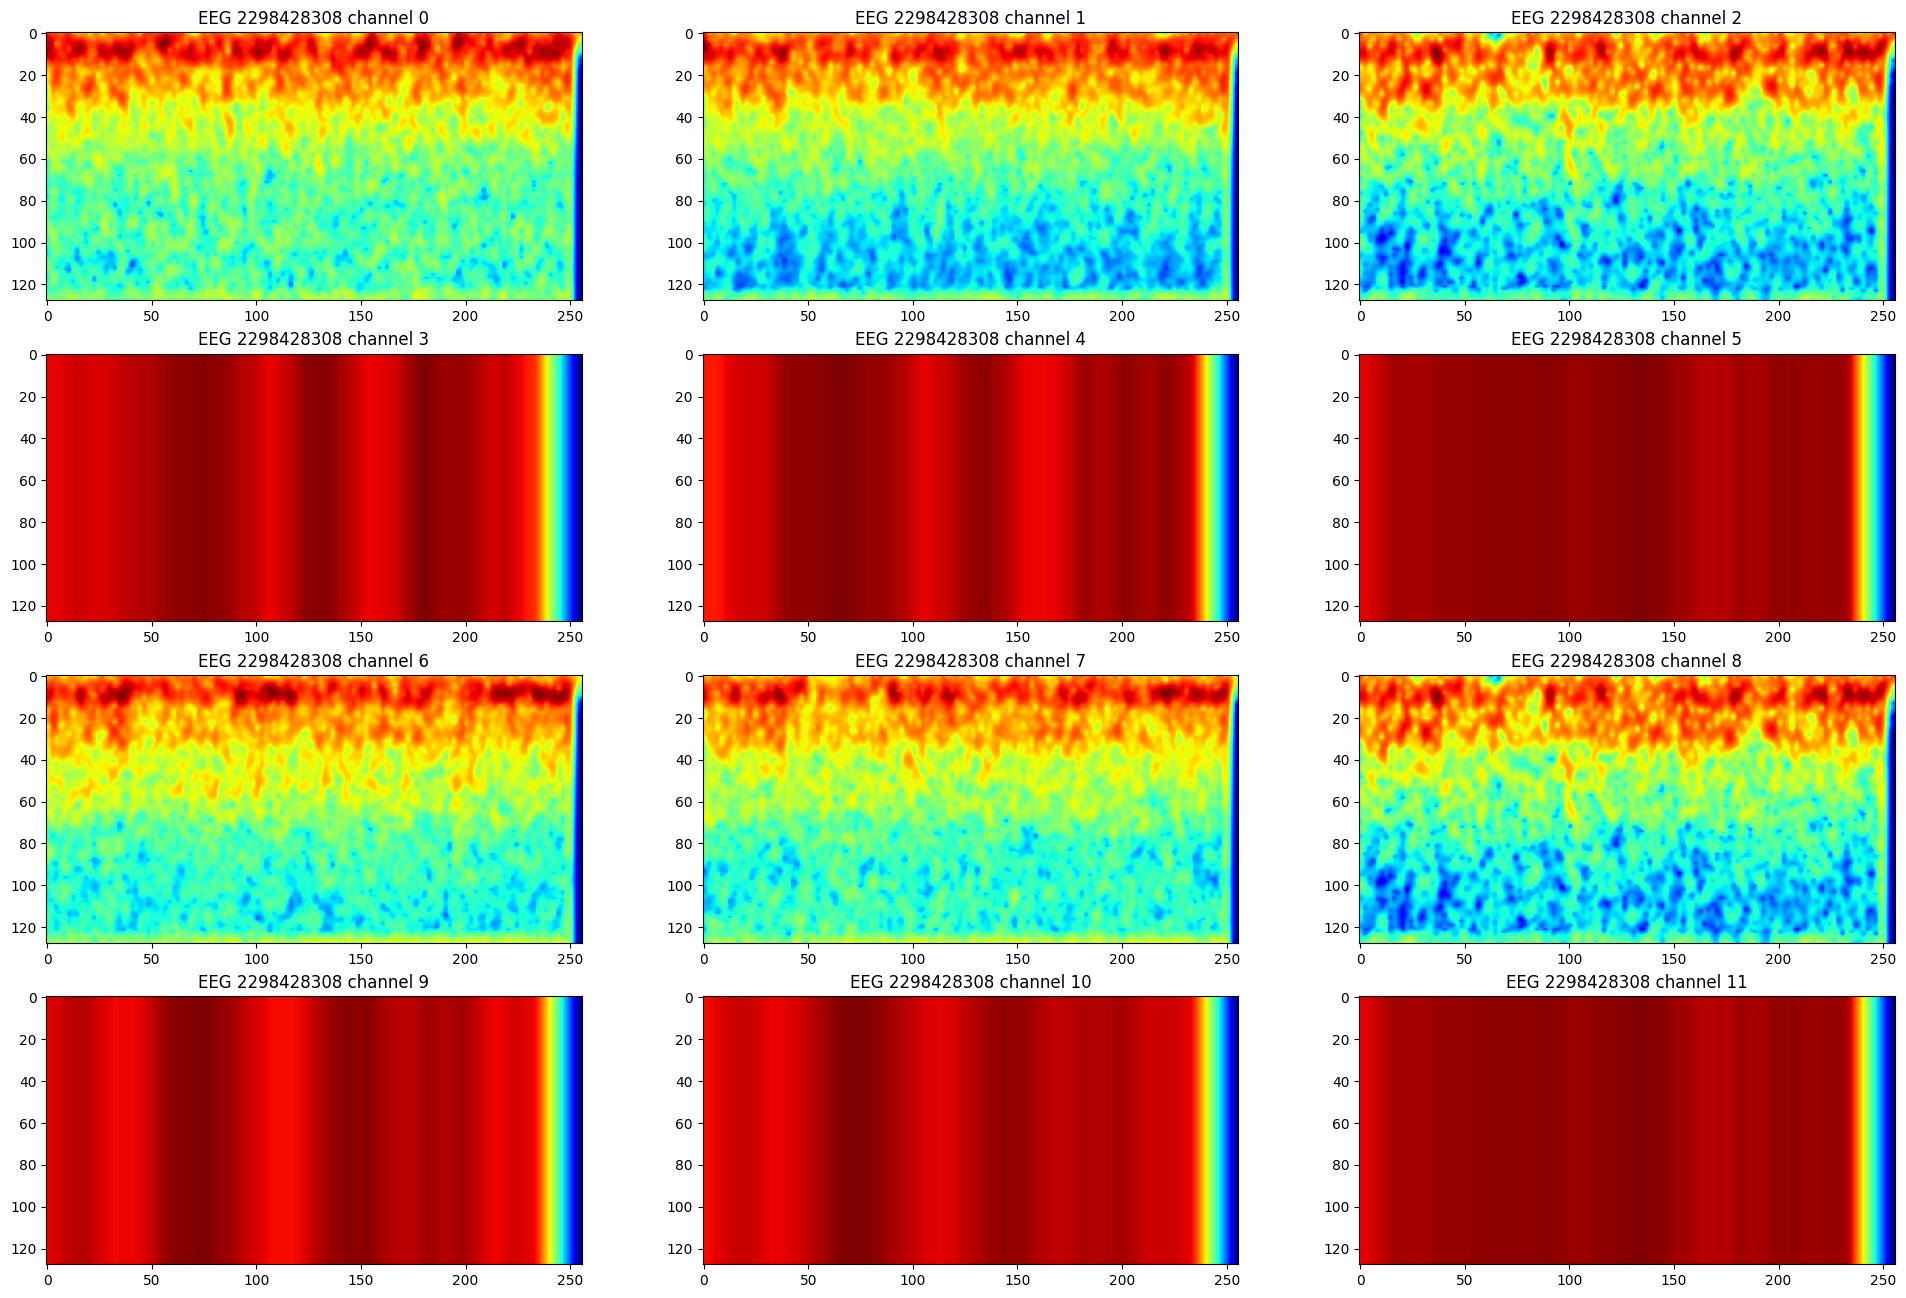

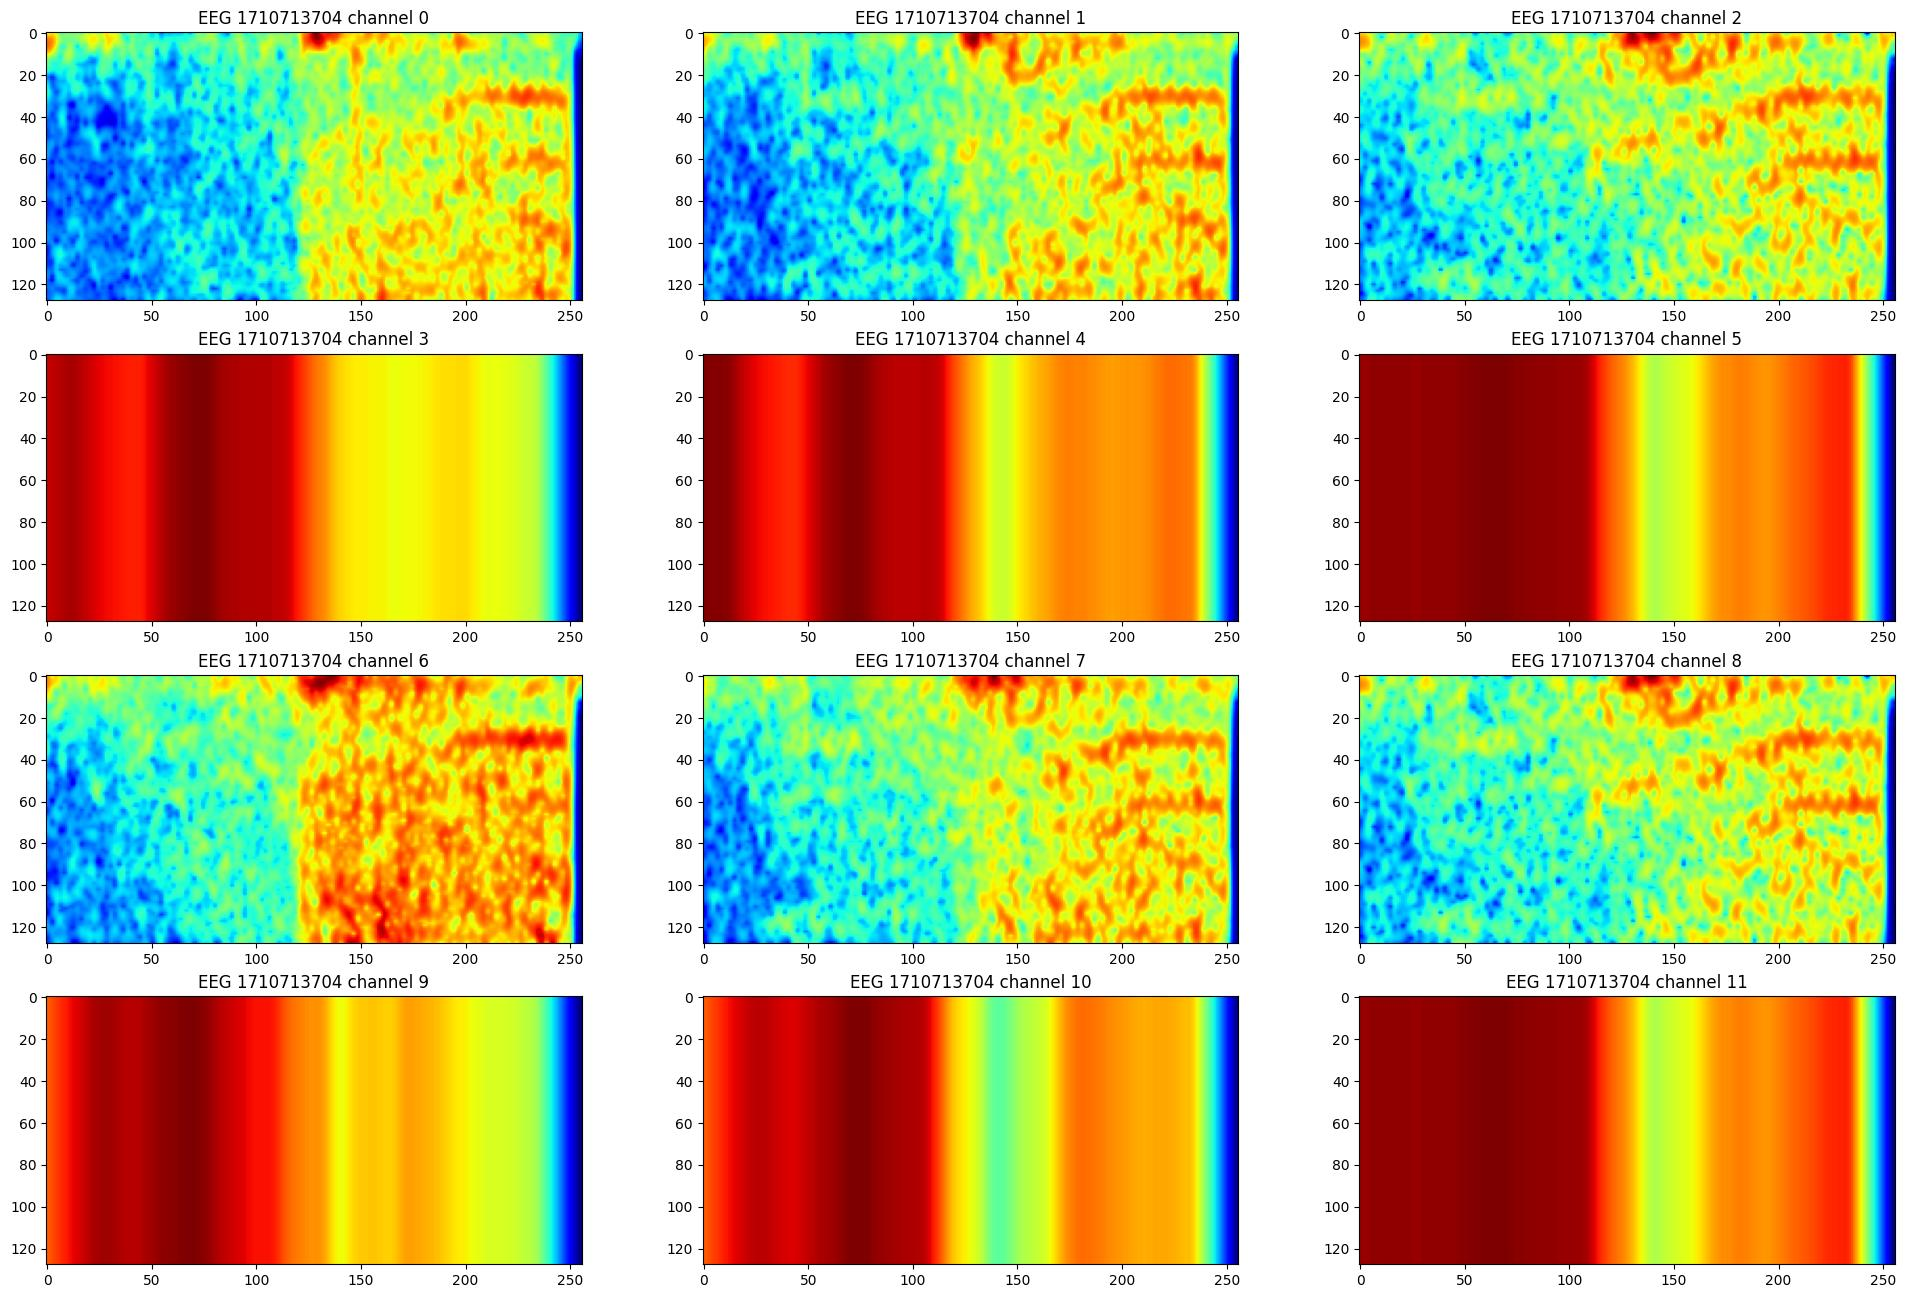

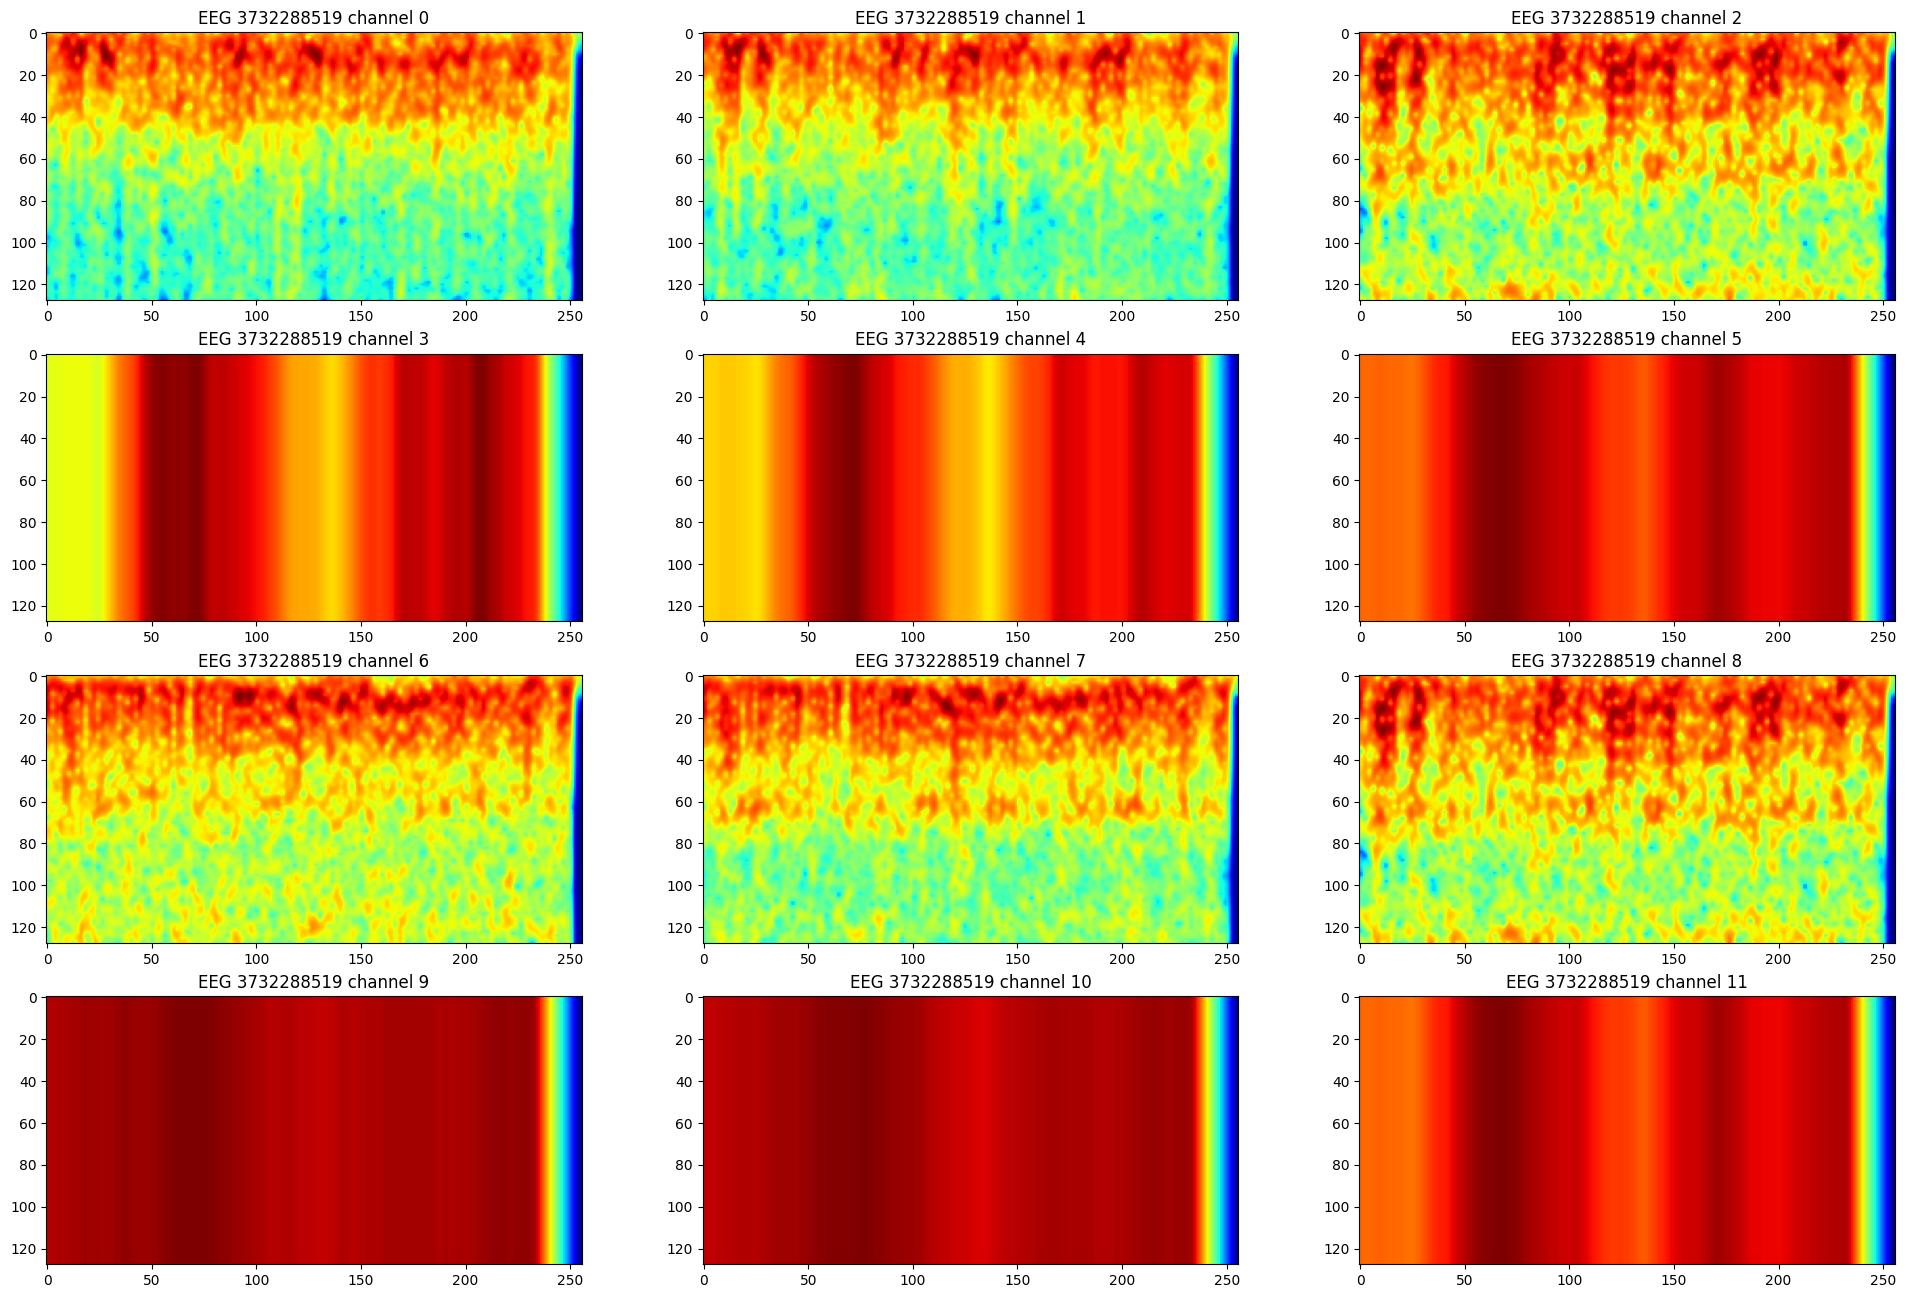

In [41]:
ch = 3

for i, (eeg_id, spec) in enumerate(specs.items()):
    C = spec.shape[-1]
    _, axs = plt.subplots(C // ch, ch, figsize=(8 * ch, 4 * (C // ch)))
    axs = axs.ravel()
    for i in range(C):
        axs[i].imshow(spec[..., i], cmap="jet")
        axs[i].set_title(f"EEG {eeg_id} channel {i}")
    plt.show()